C:\Users\AndrusRebane\AppData\Local\Temp\ipykernel_17188\3505917407.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Initial data:
         Date Close/Last    Volume      Open     High       Low
0  04/23/2024    $166.90  49537760   $165.35  $167.05   $164.92
1  04/22/2024    $165.84  48116440  $165.515  $167.26   $164.77
2  04/19/2024    $165.00  68149380   $166.21  $166.40  $164.075
3  04/18/2024    $167.04  43122900   $168.03  $168.64   $166.55
4  04/17/2024    $168.00  50901210   $169.61  $170.65   $168.00
Original Close/Last:
0    $166.90
1    $165.84
2    $165.00
3    $167.04
4    $168.00
Name: Close/Last, dtype: object
Data in Close/Last after removing $ sign:
0    166.90
1    165.84
2    165.00
3    167.04
4    168.00
Name: Close/Last, dtype: object
Data in Close/Last after conversion to float:
0    166.90
1    165.84
2    165.00
3    167.04
4    168.00
Name: Close/Last, dtype: float64
Original Open:
0     $165.35
1    $165.515
2     $166.21
3     $168.03
4     $169.61
Name: Open, dtype: object
Data in Open after removing $ sign:
0     165.35
1    165.515
2     166.21
3     168.03
4     169.61

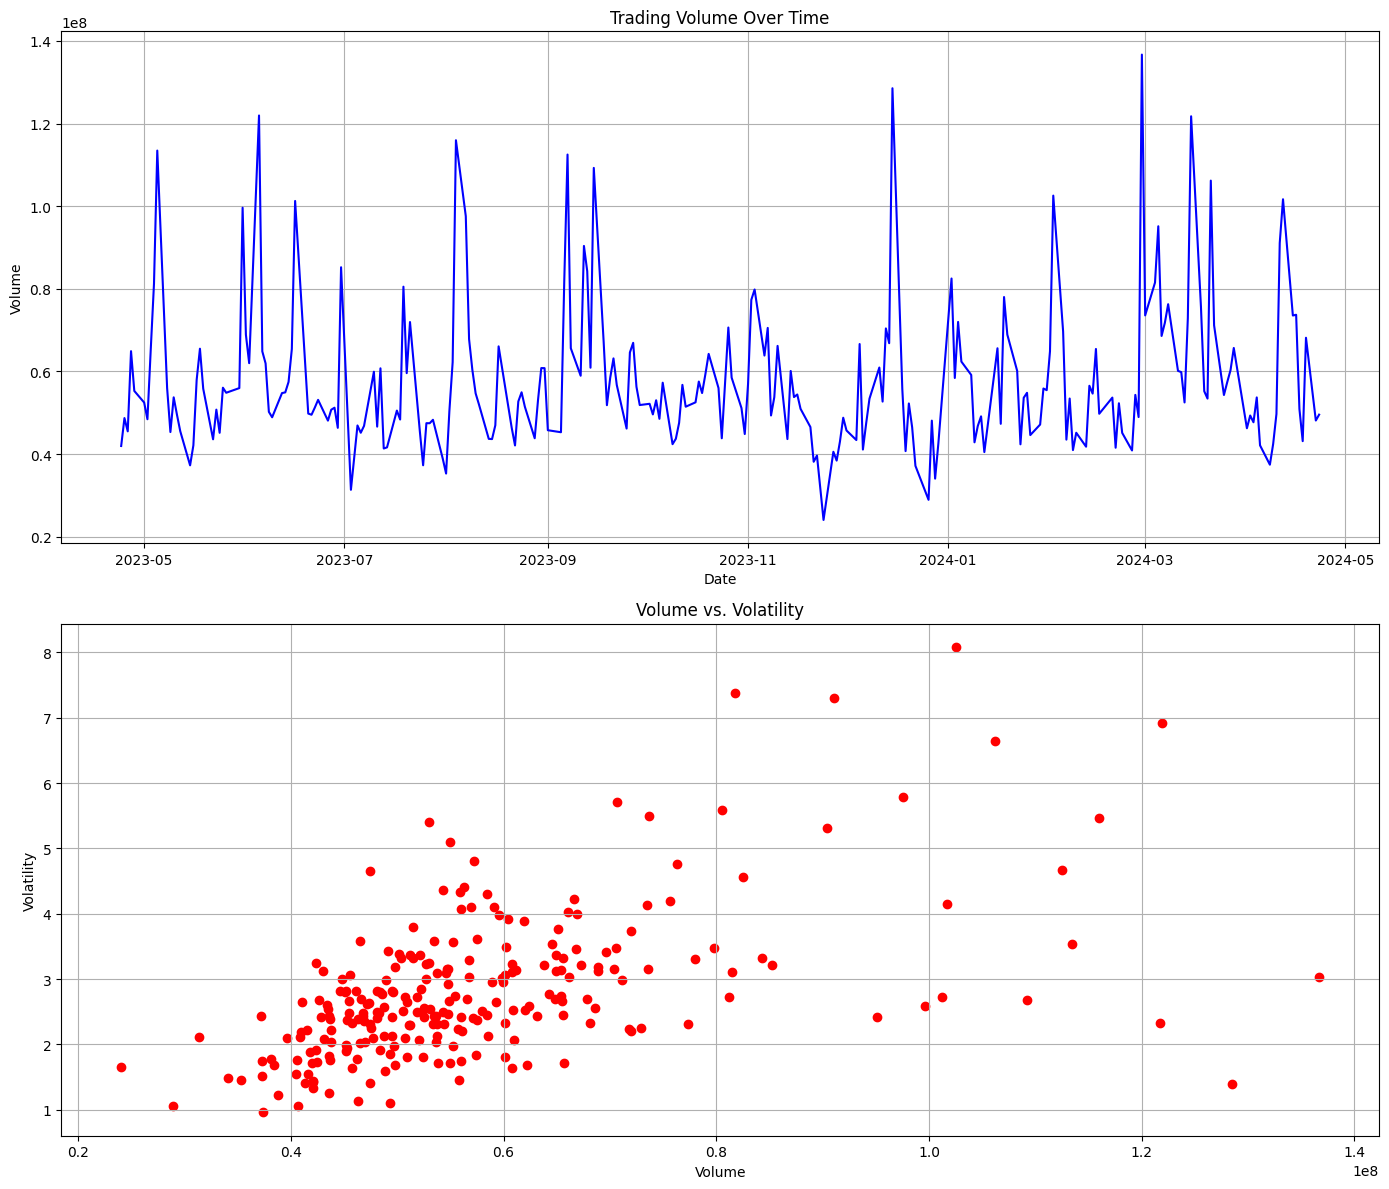

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


"""
This is a pretty cool program. I would like to build on this and have more interesting things to look at. There is a lot we can do with Python 
But let's try to focus more on the Numerical Computation side of it. 
"""

# Loading in the CSV file from NasDaq
file_path = r'C:\Users\AndrusRebane\CSCI3656\FinalProject\HistoricalData_AAPL.csv'
data = pd.read_csv(file_path)

# Print initial data for inspection this is for
print("Initial data:")
print(data.head())

# Convert Date column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Explicitly handle the transformation and conversion of price columns
# B/c the CSV files come with a bunch of extra junk, let's clean the data from 
price_columns = ['Close/Last', 'Open', 'High', 'Low']
for column in price_columns:
    # Print original column data
    print(f"Original {column}:")
    print(data[column].head())

    # Remove $ sign and any whitespace
    data[column] = data[column].str.strip().replace('[\$,]', '', regex=True)

    # Print column data after removing $ sign
    print(f"Data in {column} after removing $ sign:")
    print(data[column].head())

    # Convert to float right here 
    data[column] = data[column].astype(float)

    # Print column data after conversion to float 
    print(f"Data in {column} after conversion to float:")
    print(data[column].head())


# Calculate Volatility as High minus Low (Nievely, I'm just taking the average)
data['Volatility'] = data['High'] - data['Low']

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))

# Plotting Trading Volume Over Time
ax1.plot(data['Date'], data['Volume'], color='blue')
ax1.set_title('Trading Volume Over Time')
ax1.set_xlabel('Date')
ax1.set_ylabel('Volume')
ax1.grid(True)

# Plotting Volume and Volatility
ax2.scatter(data['Volume'], data['Volatility'], color='red')
ax2.set_title('Volume vs. Volatility')
ax2.set_xlabel('Volume')
ax2.set_ylabel('Volatility')
ax2.grid(True)

# Display the plots
plt.tight_layout()
plt.show()

In [2]:
#Let's look at what analysis whe could do witht he methods we know 
#in options flow. 